# Machine Learning
Machine Learing atau pembelajaran mesin adalah bidang dalam ilmu komputer untuk memeberikan kemampuan pada komputer keahlian untuk belajar dari data tanpa harus di program secara ekplisit

## Jenis-jenis Machine Learning
1. ### Unsupervised Learning
   * ##### clustering
   adalah pengelompokan data tanpa mengetahui label data hanya berdasarkan karakteristik tertentu saja
   * #### Reduksi dimensi
    pengurangan dimensi/feature/atribute dari data yang tujuannya untuk mengurangi noise dari data
2. ### Supervised Learning
    * #### klasifikasi, 
    bertujuan untuk memeberikan kemampuan kepada komputer untuk belajar dari data yang berlabel untuk memprediksi data yang tidak berlabel
      * **Klasifikasi biner** 
      adalah jenis kalsifikasi diman sebuah data hanya memiliki dua kelas pilihan saja.
      * **klasifikasi multi class** 
      adalah jenis klasifikasi dimana data memiliki lebih dari dua kelas.
      * **klasifikasi multi label**
      adalah kalsifikasi dimana sebuah data dapat memiliki lebih dari satu label data dari panya pilihan label kelas
    * #### regresi
    bertujuan untuk memeprediksi data yang sifatnya kontinu contohnya adalah memprediksi harga index suatu saham esok hari
3. ### Reinforcement Learning
   adalah penggunaan machine learing yang tujuannya untuk membangun sistem yang dapat meningkatkan performa suatu sistem ketika sistem berinteraksi dengan lingkungan

pada notebook ini hanya akan membahas mengani algoritma yang digunakan untuk supervised learing, algoritma-algoritma yang akan dibahas adalah
1. Regresi Logistik
2. Support Vector Machine (SVM)
3. Decision Tree
4. K Nearest Neighbors (KNN)

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

#load iris dataset
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=0)

#normalisasi data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#mengabungkan data training dan testing
X_combined_std = np.vstack((X_train_std, X_test_std))
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

/home/blacksmith/.virtualenvs/Machine_Learning/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#prosedur untuk malakukan ploting hasi training model
def plot_regions(X, y, classifier, test_idx=None,resolution=0.02,):
        
    #setting generator dan warna map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot area
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot data
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    #menandai data testing
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0,facecolors='none',edgecolors='black',
                    s=55, label='Test set')

## 1. Regresi Logistik
Regresi logistik adalah model klasifikasi yang paling sering digunakan di dunia industri, untuk lebih mudah memahami mengenai regresi logistik kita pahami dahulu mengenai rasio peluang. Rasio peluang ditulis dengan menggunakan persamaan
$$\frac{p}{(1-p)} \quad(1)$$
dimana $p$ adalah nilai untuk peluang untuk event positif, kemudian tentukan fungsi logit yang merupakan merupakan nilai logaritma dari rasio peluang.
$$logit(p)=log\frac{p}{1-p} \quad(2)$$
nilai input dari fungsi logit adalah antara 0 hingga 1 yang dapat digunakan untuk mengekspresikan mengubungkan linier antara nilai fitur dan dan rasio peluang
$$logit(p(y=1|x)) = w_0 x_0 + ... + w_m x_m = \sum_{i=0}^{m} w_i x_i = w^T x \quad(3)$$
dimana $p(y=1|x)$ adalah niali kondisional probability dimana data sample adalah kelas 1 given feature $x$. Ketika ingin mengetahui nilai probabilitas sample tertentu masuk kelas tertentu yang perlu dilakukan adalah melakukan ivers dari fungsi logit, dimana fungsi hasil invers ini dikenal juga dengan fungsi sigmoid karena bentuk S-nya yang khas dan dirumuskan dengan persamaan 
$$\Phi(z)=\frac{1}{1+e^{-z}} \quad(4)$$

dimana $z$ adalah input yang didapat dari persamaan

$$z=w^Tx = w_0 + w_1x_1+...+w_mx_m \quad(5)$$

berikut ini adalah hasil plot fungsi zigmoid untuk nilai yang berada di antara -7 hingga 7

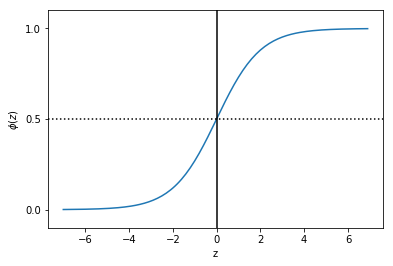

In [19]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

Berdasarkan hasil plot tersebut kita bisa mengelompkan data sample berdasarkan probabilitasya yaitu 

$$ 
\hat{y} = 
\left\{
    \begin{array}{ll} 
        1 & \mbox {if $\Phi(z) \geq 0.5$} \\
        0 & {selainnya} \\
    \end{array}
\right.
$$

Brikut ini adalah cara penggunaan dan hasil hasil plot dari regresi logistik pada library scikit-learn

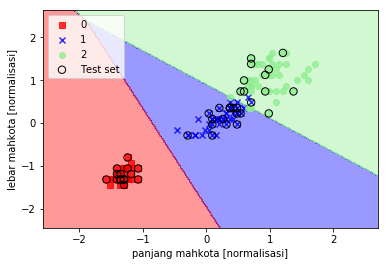

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('panjang mahkota [normalisasi]')
plt.ylabel('lebar mahkota [normalisasi]')
plt.legend(loc='upper left')
plt.show()

## 2. Support Vector Machines (SVM)
Support vector machines  adalah model kalsifikasi dimana tujuannya adalah utnuk menemukan nilai maksimal margin antar kelas. Margin adalah jarak hyperplane yang memisahkan data training yang memiliki label berbeda, data training yang paling dekat dengan hyper plane ini lah yang disebut support vector. berikut ini adalah ilustrasinya

![svm](http://drive.google.com/uc?export=view&id=1pWCPIMEgekIyrYBUpJv6AZUQeTs_9SL9)

dari ilustrasi tersebut kita bisa mengambil persamaan dari hyperplane positif sebagai berikut 
$$ w_0+w^TX_{pos} = 1 \quad (1)$$

dan persamaan untuk hyperplane negatif sebagai berikut

$$ w_0+w^Tx_{neg} =-1 \quad (2)$$

jika kita kurangi kedua persamaan tersebut antara satu dengan yang lain maka akan dihasilkan persamaan

$$ w^T(x_{pos}-x_{neg})=2 \quad (3)$$

kemudian dilakukan normalisasi pajang dari vektor w dengan menggunakan persamaan

$$ ||w|| = \sqrt{\sum_{j=1}^{m} w_j^2} \quad (4)$$

setelah itu dilakukan pembagian terhadap persamaan 3 dengan persamaan 4 sehingga didapatkan persamaan

$$\frac{w^T(x_{pos}-x_{neg})}{||w||} = \frac{2}{||w||} \quad (5)$$

persamaan di sebalah kiri merupakan persamaan yang digunakan untuk menghitung jarak antara hyperplane positif dengan hyperplane negatif, dan merupakan margin yang ingin di maksimalkan. Untuk memaksimalkan margin ini maka nilai $\frac{2}{||w||}$ perlu dimaksimalkan selama data sample diklasifikasikan secara benar dan mengikuti mengikuti aturan

$$w_0 + w^T x^{(i)} \geq 1 \quad \mbox {if $y^{(i)} = 1$} \quad (6)$$
$$w_0 + w^T x^{(i)} < -1 \quad \mbox {if $y^{(i)} = -1$} \quad (7)$$

aturan tersebut mengatakan bahwa semua data sample berlabel negatif harus masuk ke sisi hyperplane negatif dan semua data berlabel positif harus berada di sisi hyperplane positif, aturan tersebut juga dapat dituliskan sebgai berikut

$$y^{(i)}(w_o + W^T x^{(i)}) \geq 1 \quad \forall_i \quad (8)$$

namun pada praktiknya lebih mudah untuk meminimalkan nilai $\frac{1}{2}||w||^2$ dibanding memaksimalkan nilai $\frac{2}{||w||}$.

### SVM untuk data nonlinear
SVM juga bisa digunakan untuk mengklasifikasikan data yang non-linear sparable dengan menggunakan varibale slack ($\xi$) yang diperkenalkan oleh Vladimir Vapnik pada tahun 1995 dimana variabel slack perlu ditambahakan pada persamaan linier svm pada persamaan (6) dan (7) sehingga menjadi.

$$w_0 + w^T x^{(i)} \geq 1 - \xi \quad \mbox {if $y^{(i)} = 1$} \quad (9)$$
$$w_0 + w^T x^{(i)} < -1 + \xi \quad \mbox {if $y^{(i)} = -1$} \quad (10)$$

sehingga agar svm dapat mengklasifikasikan data dengan benar maka persamaan baru yang didapat dengan menanmbahakn variabel $\xi$ menjadi

$$\frac{1}{2}||w||^2+C\left({\sum_i \xi^{(i)}}\right) \quad (11)$$

dimana dengan mengontrol nilai variabel $C$ kita bisa mengontrol kelasalahan klasifikasi. semakin besar nilai variabel $C$ semakin kecil margin yang diapat dan sebaliknya, berikut adalah ilustrasinya.

![parameter C](http://drive.google.com/uc?export=view&id=1UnII1ipjBwRoPnEbTpw-RDek8oEvoI4B)

Beriut ini adalah implementasi menggunakan SVM untuk data lineary sparable dengan menggunakan scikit-learn.

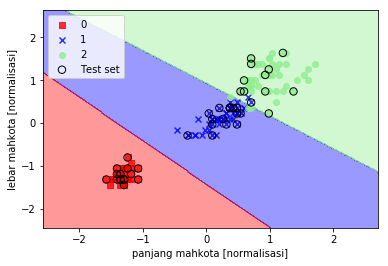

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_regions(X_combined_std, y_combined, classifier=svm, test_idx = range(105, 150))
plt.xlabel('panjang mahkota [normalisasi]')
plt.ylabel('lebar mahkota [normalisasi]')
plt.legend(loc='upper left')
plt.show()

### Support Vector Machines (SVM) untuk data nonlinear
SVM juga bisa digunakan untuk mengklasifikasikan data yang non linear sparable, pada bagian ini dataset yang digunakan bukan dataset iris tapi dataset yang didapat dari logika xor

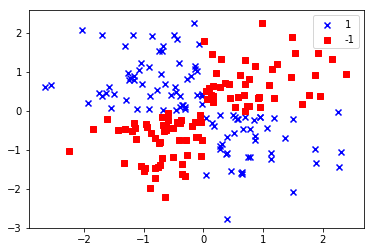

In [35]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

#plot dataset
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

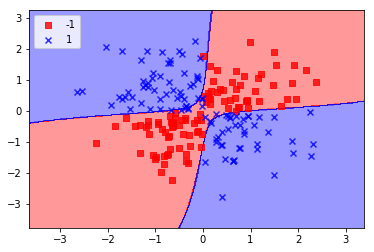

In [36]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

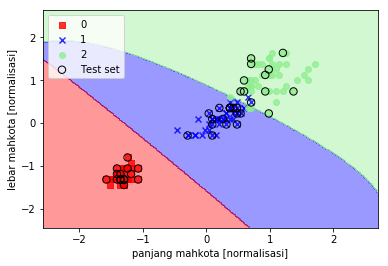

In [38]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('panjang mahkota [normalisasi]')
plt.ylabel('lebar mahkota [normalisasi]')
plt.legend(loc='upper left')
plt.show()

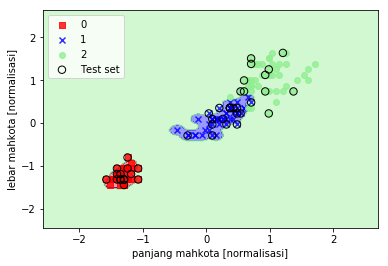

In [39]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('panjang mahkota [normalisasi]')
plt.ylabel('lebar mahkota [normalisasi]')
plt.legend(loc='upper left')
plt.show()

## 3.Decision Tree
Decision tree adalah model klasifikasi yang atraktif. Pada proses Decision tree dimulai dari akar kemudian terjadi proses spliting data berdasarkan feature yang memiliki nilai Information Gain terbesar.Proses spliting terjadi berulang-ulang hingga menghasilkan daun, berikut ini adalah persamaan untuk menghitung nilai Information Gain

$$IG(D_p,f) = I(D_p)-\sum_{j=1}^m \frac{N_j}{N_p}I(D_j) \quad(1)$$

dimana $f$ adalah feature untuk split, $D_p$ adalah dataset untuk parent dan $D_j$ adalah dataset unutk child node ke-j, $I$ adalah nilai impurity, $N_p$ adalah total sample pada parent node dan $N_j$ adalah jumlah data sample pada child node ke-j.

dari persamaan tersebut kita melihat dua nilai Impurity yang pertama impurity untuk parent dan kedua adalah impurity dari jumlah semua node, semakin kecil nilai impurity pada child node semakin besar nilai Information Gain yang didapat. pada persamaan tersebut kita bisa melihat bahwa parent bisa memiliki lebih dari dua child node hal ini dapat memperluas ruang pencarian, oleh karena itu banyak library mengimplementasikan binary decision tree. yang berarti setiap node parent hanya memiliki dua induk node yaitu $D_{left}$ dan $D_{right}$ sehingga dari persamaan untuk binary decision tree menjadi

$$IG(D_p,f)=I(D_p)-\frac{N_{left}}{N_p}I(D_{left})-\frac{N_{right}}{N_p}I(D_{right}) \quad(2)$$

pada binary decision tree ada tiga cara menentukan nilai impurity yang biasanya digunakan yaitu Gini impurity $(I_G)$, entropy $(I_H)$ dan klasifikasi error $(I_E)$.Mari kita pahami dulu mengenai perhitungan impurity dengan menggunakan entropy untuk non-empty class $p(i|t) \neq 0$

$$I_H(t) = -\sum_{j=1}{c}p(i|t)log_2p(i|t) \quad(3)$$

$p(i|t)$ adalah proporsi data sample yang termasuk kelas ke-$i$ untuk node ke-$t$. Nilai entropi akan bernilai 0 jika semua data sample memiliki kelas yang sama dan akan bernilai maksimal jika data kelasnnya terdistibusi uniform. Sebagai contoh jika $p(i=1|t)=1$ atau $p(i=0|t)=0$ maka nilai entropi yang didapatkan adalah 0 sedangkan nilai entropi akan bernilai 1 jika $p(i=1|t)=0.5$ atau $p(i=0|t)=0.5$. Pada dcision tree kita bisa sebut nilai entropi sebgai nilai kriteria untuk memaksimalkan nilai mutual information.

Nilai gini impurity pada decision tree bisa juga dipahami sebagai kriteria untuk meminimalkan probabilitas kesalahan klasifikasi yang ditulis dengan persamaan

$$I_G(t)=\sum_{j=1}^cp(i|t)(1-p(i|t)) = 1-\sum{j=1}{c}p(i|t)^2\quad(3)$$

layaknya nilai entropi nilai Gini impurity akan maksimal jika kelas tercampur dengan sempurna. Pada prakteknya Gini impurity dan entropi memberikan hasil sangat mirip. cara lain untuk mengukur nilai impurity adalah dengan menghitung nilai klasifikasi error yang ditulis dengan persamaan

$$I_E = 1 - max\{p(i|t)\}$$

berikut ini adalah visualisasi perbandingan nilai impurity dari ketiga persamaan tersebut.

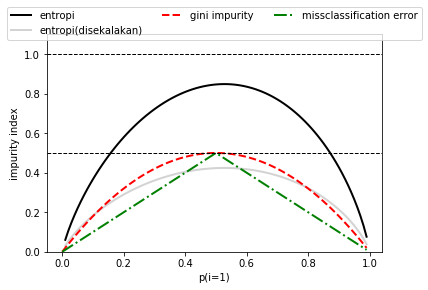

In [40]:
def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))

def entropy(p):
    return - p*np.log(p)-(1-p)*np.log2((1-p))

def error(p):
    return 1-np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['entropi', 'entropi(disekalakan)',
                           'gini impurity', 'missclassification error'],
                          ['-', '-', '--', '-.'], 
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

Berikut ini adalah implementasi decision tree dengan menggunakan library scikit-learn. Decision tree bisa membentuk decision boundary yang kompleks dengan membagi feature space ke bentuk persegi, hal yang perlu diperhatikan semakin dalam pohon yang dibentuk maka decision boundary yang dihasilkan juga semakin kompleks hal ini dapat menyebabkan overfit.

Pada pembuatan decision tree dengan menggunakan scikit-learn kita menentukan kedalaman pohon 3 dan penentuan kriteria impurity dengan menggunakan perhitungan entropi.

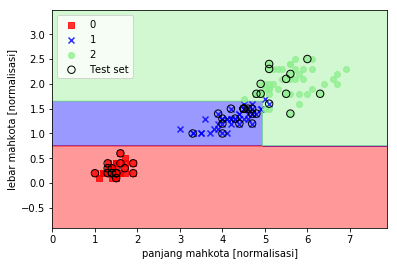

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
plot_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('panjang mahkota [normalisasi]')
plt.ylabel('lebar mahkota [normalisasi]')
plt.legend(loc='upper left')
plt.show()

Setelah diklasifikasikan, sicikit-learn bisa melakukan export decision tree yang dibuat ke file berformat .dot yang dimana bisa divisualisakian dengan GraphFiz

In [44]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['panjang mahkota', 'lebar mahkota'])

Untuk melakukan visualisasi terhadap file decision tree yang sudah di export bisa menggunakan command
```command
dot -Tpng tree.dot -o tree.png```
dimana akan mengahsilkan data gambar berformat PNG dengan nama tree. jika GraphViz belum terinstall pada os Ubuntu bisa disintall dengan mnggunakan command
```command
sudo apt-get install graphviz -y```
untuk Mac dan Windows silakan cek laman resmi GraphViz di http://www.graphviz.org <br>
berikut ini adalah hasil visulaisasi decision tree yang didapat.
![Decision tree](http://drive.google.com/uc?export=view&id=1Ak3VevP7YK8al67nwCszl7ZjGuMoNHK2)

## 4.K-nearest nighbors (kNN)
kNN adalah contoh dari algoritma lazy learner, disebut lazy learner karena ... proses pada klasifikasi KNN adalah sebagai berikut
1. pilih nilai paramteter $k$ dan tentukan distance metric yang akan digunakan, persamaan umum yang digunakan untuk menghitung nilai distance matric pada kNN adalah minkowski yang ditulis sebagai berikut$$d(x^{(i)}, x^{(j)}) = \sqrt[p]{\sum_k|x_f^{(i)}-x_f^{(j)}|^p}$$dimana $x^{(i)}$ adalah data testing dan $x^{(j)}$ adalah data training paramter $f$ adalah feature. Nilai paramter $p$ jika di assign 1 akan menjadi Manhattan distance dan jika di assign 2 akan menjadi Euclidean distance
2. Temukan tetangga terdekat dengan data sample sejumlah $k$ data training
3. labeli data testing dengan label baru berdasarkan label data paling dominan dari hasil vote.

hal yang perlu diingat adalah model KNN adalah model yang rentan terkena overfitting dikarenakan **curse of dimensionality**. Curse of dimensionality adalah fenomena dimana feature space menjadi jarang untuk jumlah dimensi data yang meningkat dari data training yang ukurannya tetap. selain itu hal lain yang diperlu diperhatikan adalah nilai parameter $k$ yang dapat menyebabkan overfit dan underfit

berikut ini adalah implementasi KNN dengan menggunakan library scikit-learn

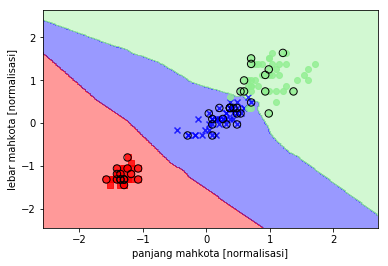

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('panjang mahkota [normalisasi]')
plt.ylabel('lebar mahkota [normalisasi]')
plt.show()